# Batch Size

In [1]:
from content_opener import open_all_contents, open_contents, Results, Settings, Values, Labels
from typing import List
import matplotlib.pyplot as plt
import numpy as np

## Test batch sizes

datasets:
'CIFAR10',
'CIFAR100'

nets:
'ResNet18'

optimizers:
'SGD',
'Adam',
'AdaSecant'

cycles:
'constantLR',
'100-cycle',
'50-cycle',
'25-cycle'

decays:
'exponentialDecay=False',
'exponentialDecay=True',
'exponentialDecay=maxLR',
'exponentialDecay=slope'


learning rates:
'lr=0.001',
'lr=0.01',
'lr=0.1',
'lr=1',
'lr=3',
'lr=0.01-1',
'lr=0.01-3',
'lr=0.001-1',
'lr=0.001-3'

batch-sizes:
'batch-size=32',
'batch-size=128',
'batch-size=512',
'batch-size=2048'

In [8]:
def compare_batch_sizes(dataset: str, net: str, optimizer: str, cycle: str, decay: str, lr: str):
    settings_list = []
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch_size=32'))
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch_size=128'))
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch_size=512'))
    results = open_all_contents(settings_list)
    for i in range(len(results)):
        plt.plot(results[i].values.val_accuracy, label='batch size ' + results[i].get_labels().batch_size)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.ylim(0.66, 1)
    plt.legend()
    labels = results[0].get_labels()
    lr = labels.initial_lr
    if results[0].settings.cycle != 'constantLR':
        lr = lr + '-' + labels.max_lr
    plt.title(labels.dataset + ', '
              + labels.net + ', '
              + labels.optimizer + ', '
              + labels.decay + ', '
              + labels.cycle + ', '
              + 'lr = ' + lr)

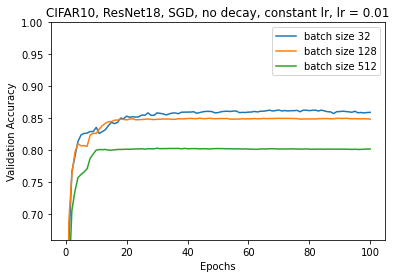

In [9]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.01'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

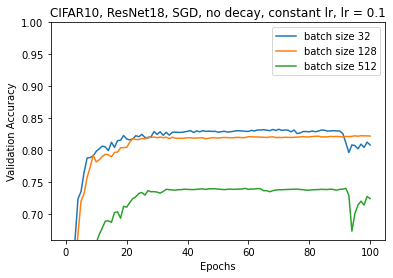

In [10]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

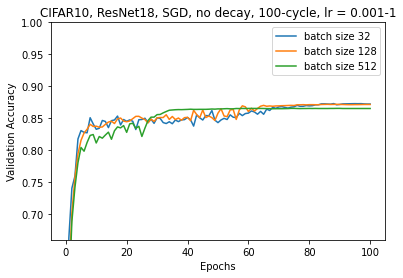

In [11]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = '100-cycle'
decay = 'exponentialDecay=False'
lr = 'lr=0.001-1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

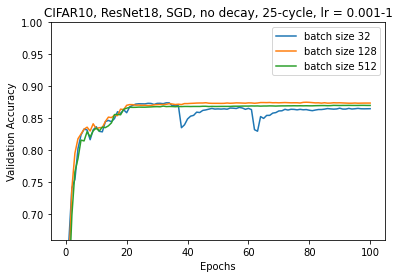

In [12]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = '25-cycle'
decay = 'exponentialDecay=False'
lr = 'lr=0.001-1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

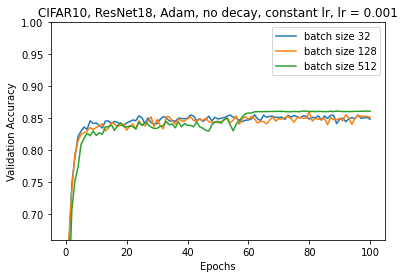

In [13]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'Adam'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.001'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

## Conclusion for SGD

We evaluate the quality of our results based on validation accuracy. For constant learning rates a clear hierarchy, with small batch sizes at the top and larger batch sizes at the bottom, can be observed. Nonetheless, the difference in quality between batch size 32 and 128 is almost neglegible. We even observe some distortions when larger learning rates (0.1) are involved. The loss function destablizes too much. This holds true for cyclical learning rates as well. For the 25-cycle, we even observe the results getting worse with a batch size of 32 compared to an optimal performance with batch size 128.


An optimal choice of batch-sizes for our experiments will therefore be made as follows:
- For all learning rates we chosse a batch size of 128.

Thus, we give each learning rate scheme an optimal bases for performance.